In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from digibase import digiBaseRH, read_background
from time import sleep

In [2]:
base = digiBaseRH()
base.SREG

31 0a 0c 00 00 30 20 03 00 00 00 00 00 00 20 00  
00 00 20 00 00 28 00 00 00 00 00 00 00 00 00 00  
00 00 00 00 00 00 00 00 ff 03 80 02 00 00 00 00  
00 00 00 00 00 00 00 00 5e 01 2c 01 fa 00 00 00  
00 00 9e 00 85 00 6c 00 40 00 00 00 04 0c 24 00  


In [4]:
base.enable_hv()
base.clear_spectrum()
base.start()
spectra = []
for i in range(10):
    sleep(6)
    spectra.append(base.spectrum)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [5]:
spec = np.array(spectra, dtype=np.int32)

In [6]:
spec.shape

(10, 1024)

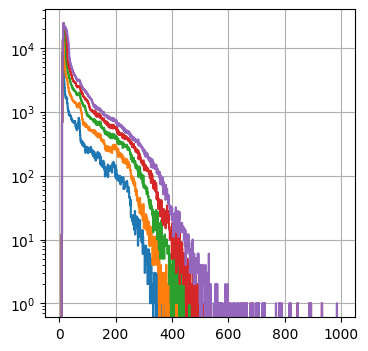

In [9]:
fig = plt.figure(figsize=(4,4))
plt.step(np.arange(1000), spec[0,:1000])
plt.step(np.arange(1000), spec[1,:1000])
plt.step(np.arange(1000), spec[2,:1000])
plt.step(np.arange(1000), spec[3,:1000])
plt.step(np.arange(1000), spec[4,:1000])

plt.yscale('log')
plt.grid()

/tmp/ipykernel_4241/3306636204.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(spec[5]/spec[4])
/tmp/ipykernel_4241/3306636204.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(spec[5]/spec[4])


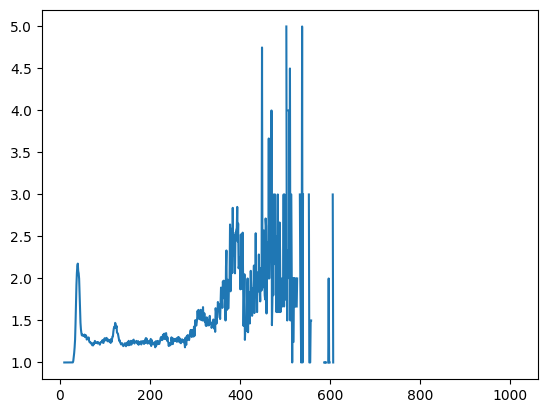

In [12]:
plt.plot(spec[5]/spec[4])

In [60]:
bkg07, date, exposure, comment = read_background('BGO-NoSource-07.dat')
bkg09, date, exposure, comment = read_background('BGO-NoSource-09.dat')
bkg10, date, exposure, comment = read_background('BGO-NoSource-10.dat')

In [13]:
np.save('spectra.dat', spec)

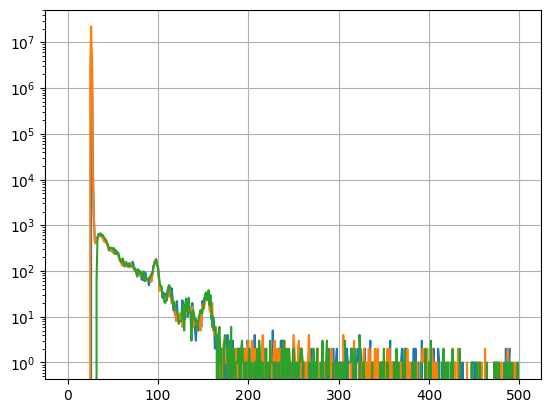

In [62]:
plt.plot(bkg07[0:500])
plt.plot(bkg09[0:500])
plt.plot(bkg10[0:500])
plt.yscale('log')
plt.grid()